# first import libraries



from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
import cv2
import os 
import glob as gb
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


# check the Train folder

In [4]:
trainpath = '/content/drive/MyDrive/brain_tumor/'
for folder in  os.listdir(trainpath + 'Training') : 
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1321 in folder glioma
For training data , found 1457 in folder pituitary
For training data , found 1339 in folder meningioma
For training data , found 1595 in folder notumor


# check the test folder

In [5]:
testpath  = '/content/drive/MyDrive/brain_tumor/'
for folder in  os.listdir(testpath + 'Testing') : 
    files = gb.glob(pathname= str( testpath +'Testing//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 300 in folder glioma
For testing data , found 405 in folder notumor
For testing data , found 300 in folder pituitary
For testing data , found 306 in folder meningioma


In [6]:
code = {'glioma' : 0 , 'meningioma' : 1, 'notumor' : 2 , 'pituitary' : 3  }
#create a dictionary with their names & index , also create a function to get the index back
def convert_code (k):
    for x , y in code.items():
        if y == k :
            return x

In [7]:
X_train = [] #Training Dataset
y_train = [] #Training Labels
for folder in  os.listdir(trainpath +'Training') : 
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        X_train.append(list(image))
        y_train.append(code[folder])

In [8]:
print(f'we have {len(X_train)} items in X_train')

we have 5712 items in X_train


 we have have a look to random pictures in X_train , and to adjust their title using the y valu

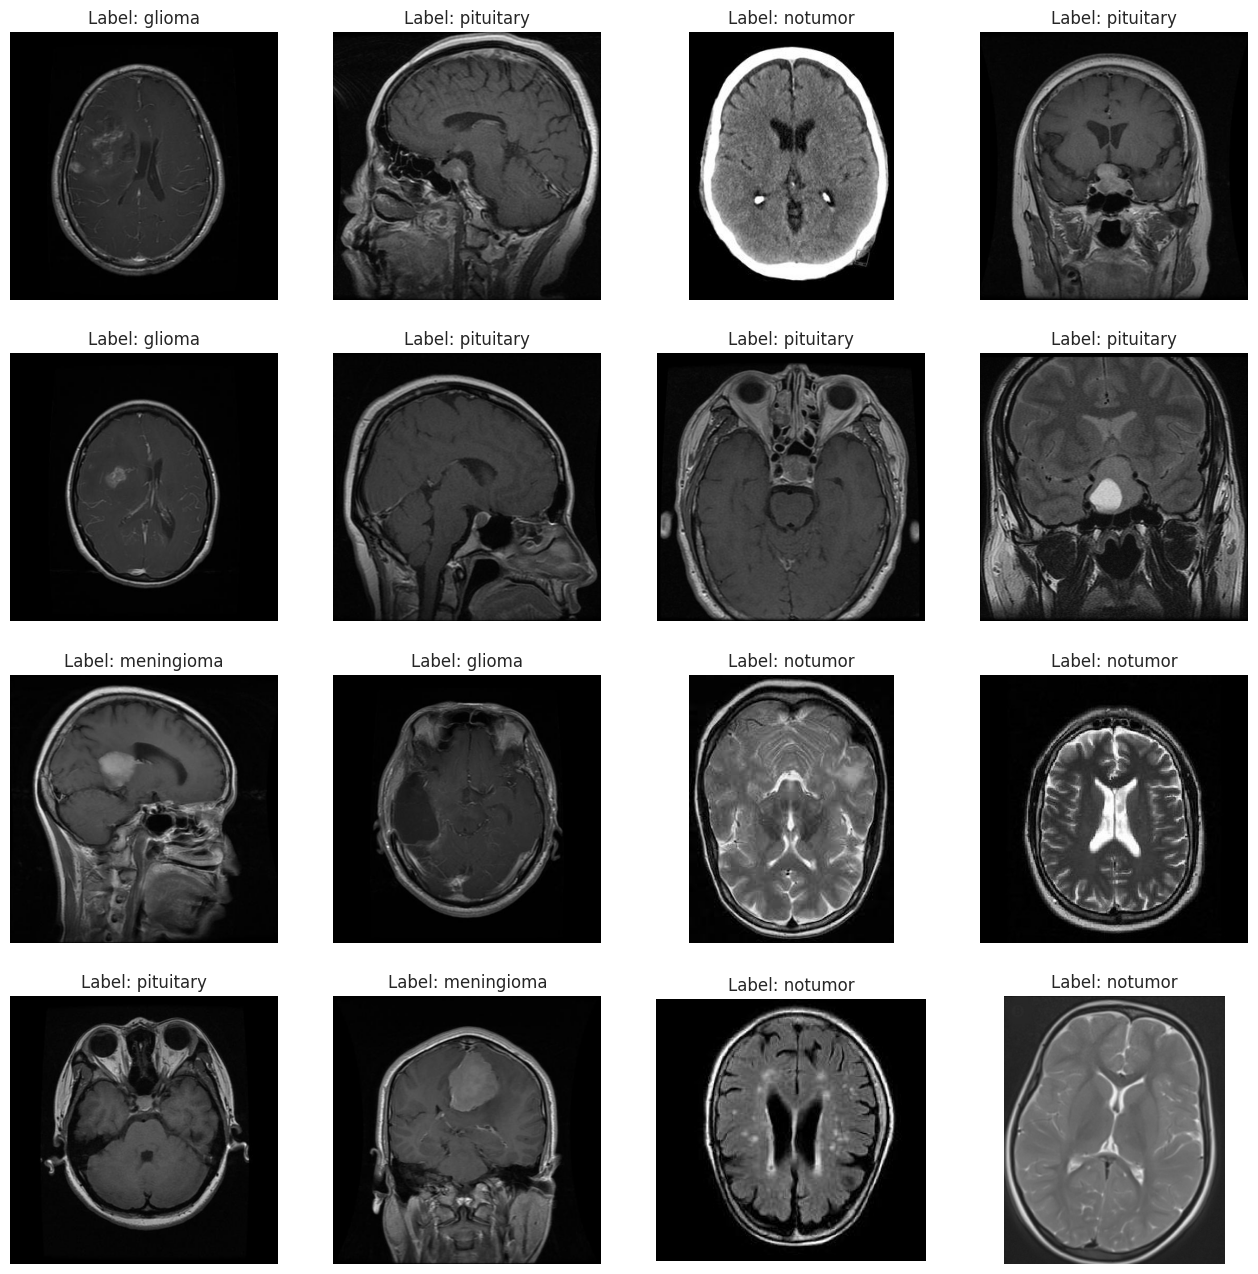

In [9]:
plt.figure(figsize=(16,16))
for ax , i in enumerate(list(np.random.randint(0,len(X_train),16))) : 
    plt.subplot(4,4,ax+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title('Label: '+convert_code(y_train[i]))

In [10]:
X_test = [] # testing Dataset
y_test = [] # testing Labels
for folder in  os.listdir(trainpath +'Training') : 
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        X_train.append(list(image))
        y_train.append(code[folder])

we have have a look to random pictures in x_test , and to adjust their title using the y valu

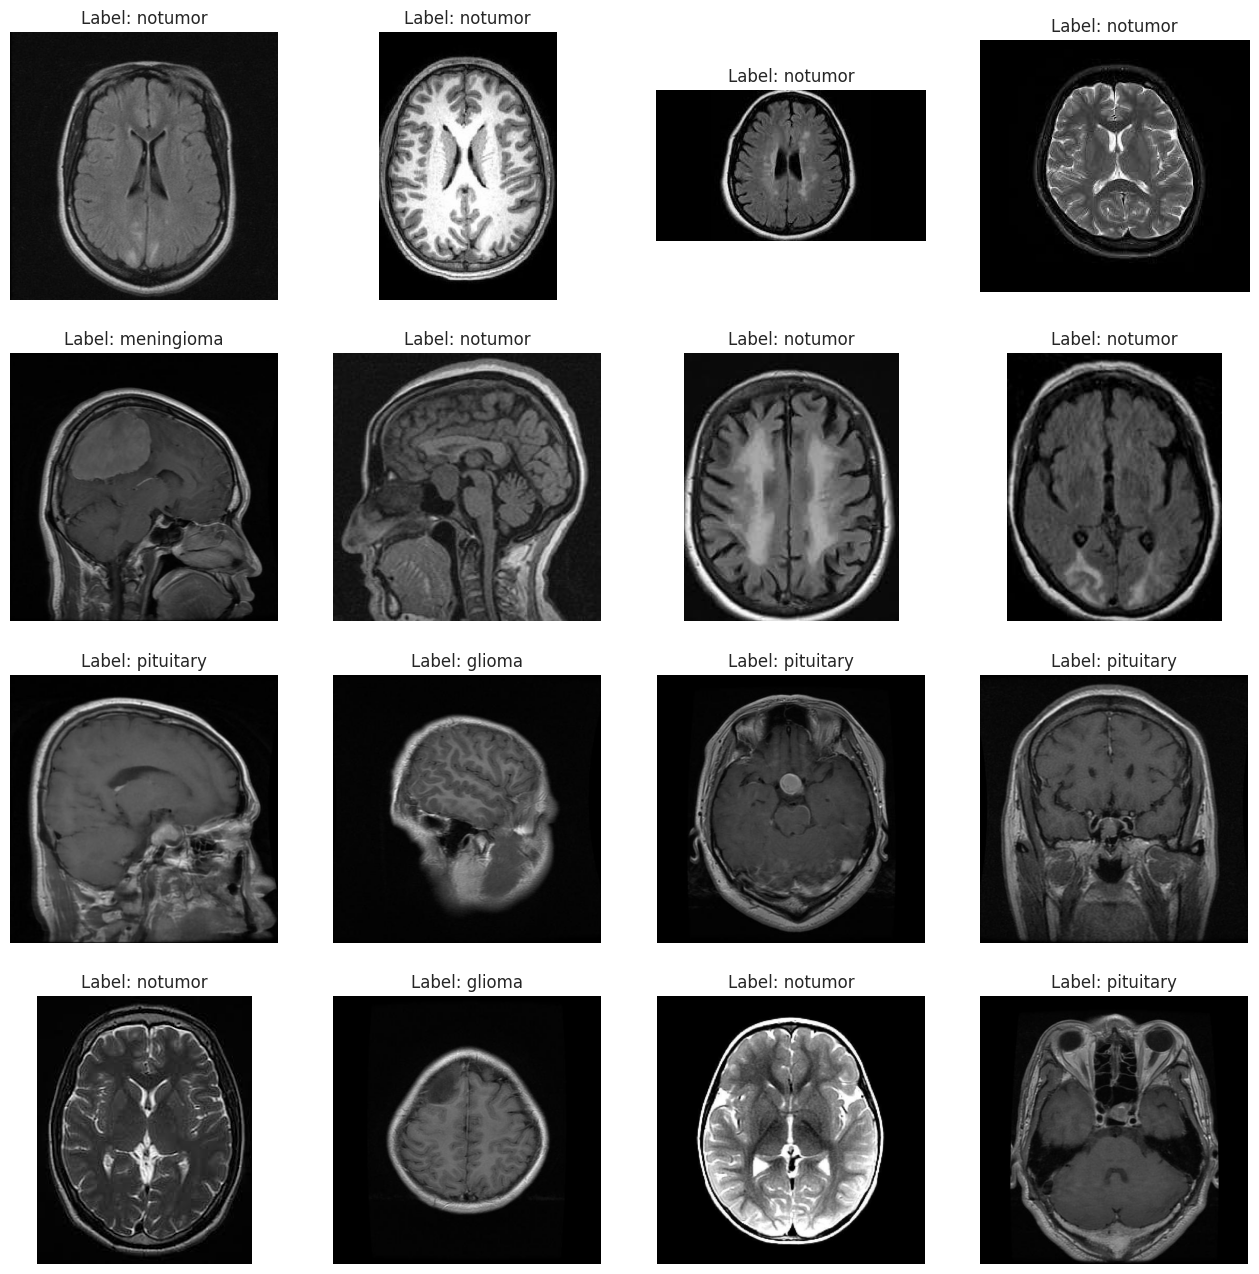

In [11]:
plt.figure(figsize=(16,16))
for ax , i in enumerate(list(np.random.randint(0,len(X_train),16))) : 
    plt.subplot(4,4,ax+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title('Label: '+convert_code(y_train[i]))

# Build CNN model

In [12]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

# Data Augmentation

In [13]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)
s = 200
train = generator_train.flow_from_directory('/content/drive/MyDrive/brain_tumor/Training', target_size=(s, s),batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/brain_tumor/Testing', target_size=(s, s),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

In [15]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model_mcp = ModelCheckpoint(filepath = 'model_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history = model.fit(train, steps_per_epoch=5712//32, epochs=25, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/25
178/178 [==============================] - ETA: 0s - loss: 0.7111 - categorical_accuracy: 0.7410
Epoch 1: val_categorical_accuracy improved from -inf to 0.23281, saving model to model_weights.h5
178/178 [==============================] - 110s 520ms/step - loss: 0.7111 - categorical_accuracy: 0.7410 - val_loss: 1.5155 - val_categorical_accuracy: 0.2328 - lr: 0.0010
Epoch 2/25
178/178 [==============================] - ETA: 0s - loss: 0.4020 - categorical_accuracy: 0.8488
Epoch 2: val_categorical_accuracy improved from 0.23281 to 0.40000, saving model to model_weights.h5
178/178 [==============================] - 41s 228ms/step - loss: 0.4020 - categorical_accuracy: 0.8488 - val_loss: 1.7337 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 3/25
178/178 [==============================] - ETA: 0s - loss: 0.3086 - categorical_accuracy: 0.8870
Epoch 3: val_categorical_accuracy improved from 0.40000 to 0.75547, saving model to model_weights.h5
178/178 [========================

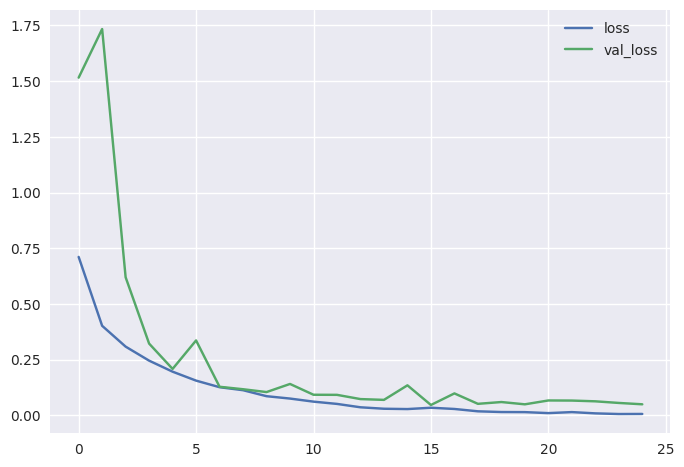

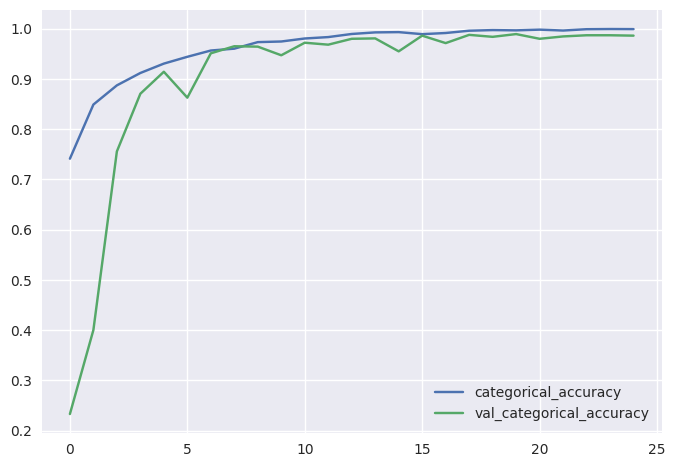

In [16]:

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy','val_categorical_accuracy']].plot();

# evaluate the model in real 

In [1]:
from tensorflow.keras.models import load_model

In [2]:
new_model= load_model('model_weights.h5')

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
import numpy as np

In [7]:
# Load the image
img_path = "pit.jpg"
img = load_img(img_path, target_size=(200, 200), grayscale=True)

# Convert the image to a numpy array
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Normalize the pixel values
x = x / 255.0

# Make the prediction
prediction = new_model.predict(x)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted tumor type
if predicted_class == 0:
    print("Glioma")
elif predicted_class == 1:
    print("Meningioma")
elif predicted_class == 2:
    print("No tumor")
elif predicted_class == 3:
    print("Pituitary")
else:
    print("Unknown class label")

1/1 [==============================] - 0s 194ms/step
Pituitary


In [2]:
import requests

# Set the URL of the Flask API endpoint
url = 'http://127.0.0.1:5000/predict'

# Set the path of the image file to predict
image_path = 'meni.jpg'

# Open the image file in binary mode
with open(image_path, 'rb') as f:
    # Send a POST request to the Flask API with the image file attached
    response = requests.post(url, files={'image': f})

# Check if the request was successful (status code 200)
if response.ok:
    # Parse the JSON response
    prediction = response.json()
    # Print the predicted tumor type
    print('Predicted tumor type:', prediction['tumor_type'])
else:
    # Print the error message and status code
    print('Request failed with error:', response.content, response.status_code)

Request failed with error: b'{"error":"Internal server error"}\n' 500
